## Soccer National Team Selection Predictor

by Md Nafisul Hasan Sami

In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier



# Load the data
df = pd.read_csv("top5-players.csv")

# Display shape and column info
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Drop irrelevant columns (e.g., Player name, Squad name, etc.)
df = df.drop(columns=["Rk", "Player", "Squad", "Comp", "Born"])

# Drop rows with missing values (optional: or fill them)
df.dropna(inplace=True)

# Display cleaned data
display(df.head())


Dataset shape: (2852, 37)

Missing values:
 Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64


,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,eng ENG,DF,23.0,20,13,1237,13.7,0,1,1,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,us USA,"MF,FW",22.0,30,14,1267,14.1,2,2,4,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,us USA,MF,19.0,7,1,101,1.1,0,1,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,fr FRA,FW,17.0,1,0,4,0.0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ma MAR,DF,35.0,31,31,2781,30.9,4,0,4,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [24]:

# Copy the original dataframes
df_original = pd.read_csv("top5-players.csv")
df_national = pd.read_csv("2ndDataSoccer.csv")

# Combine given and family names from national team dataset
df_national["full_name"] = (df_national["given_name"] + " " + df_national["family_name"]).str.lower().str.strip()

# Normalize player names in original dataset
df_original["normalized_name"] = df_original["Player"].str.lower().str.strip()

# Create a 'Selected' column based on match with national team names
df_original["Selected"] = df_original["normalized_name"].isin(df_national["full_name"]).astype(int)

# Count how many players are selected
selected_count = df_original["Selected"].value_counts()


selected_count


Selected
0    2365
1     487
Name: count, dtype: int64

In [25]:

# Combine given and family names from national team dataset
df_national["full_name"] = (df_national["given_name"] + " " + df_national["family_name"]).str.lower().str.strip()

# Normalize player names in original dataset
df_original["normalized_name"] = df_original["Player"].str.lower().str.strip()

# Create a 'Selected' column based on match
df_original["Selected"] = df_original["normalized_name"].isin(df_national["full_name"]).astype(int)

# Check how many players were marked as selected
print(df_original["Selected"].value_counts())

# Preview the updated data
df_original.head()


Selected
0    2365
1     487
Name: count, dtype: int64


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,normalized_name,Selected
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,max aarons,0
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,brenden aaronson,1
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,paxten aaronson,0
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,keyliane abdallah,0
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,yunis abdelhamid,0


In [26]:

# Drop columns not useful for prediction
df = df_original.drop(columns=[
    "Rk", "Player", "Squad", "Comp", "Born", "Nation", "Pos", "normalized_name"
])

# Drop rows with missing values (or optionally use df.fillna())
df = df.dropna()

# Confirm clean data
print("Remaining rows:", df.shape[0])


Remaining rows: 2847


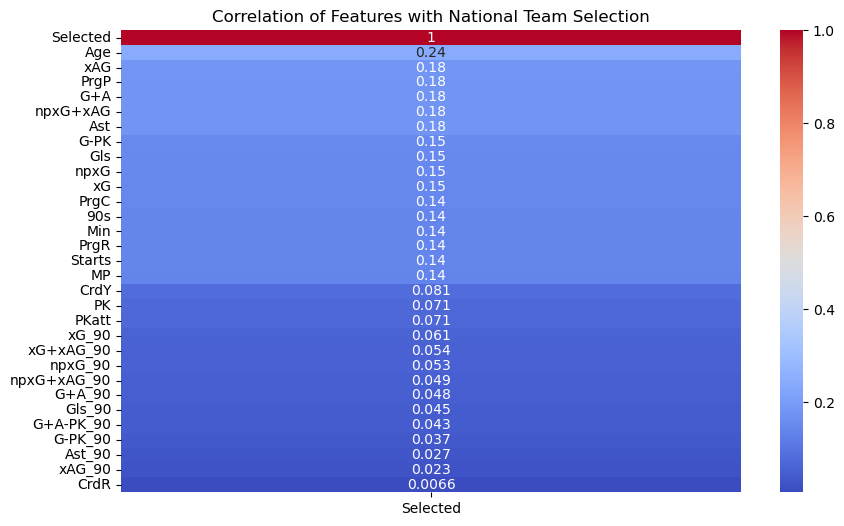

In [27]:

# Only keep numeric features for correlation
corr = df.corr(numeric_only=True)

# Correlation with target
plt.figure(figsize=(10, 6))
sns.heatmap(corr[["Selected"]].sort_values(by="Selected", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with National Team Selection")
plt.show()



In [28]:

# Separate features and target
X = df.drop(columns=["Selected"])
y = df["Selected"]


     

In [29]:

# Split the dataset
X = df.drop(columns=["Selected"])
y = df["Selected"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize two models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train both models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation: Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Evaluation: Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       472
           1       0.32      0.06      0.10        98

    accuracy                           0.82       570
   macro avg       0.57      0.52      0.50       570
weighted avg       0.74      0.82      0.76       570


Random Forest Results:
Accuracy: 0.8175438596491228
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       472
           1       0.36      0.08      0.13        98

    accuracy                           0.82       570
   macro avg       0.60      0.53      0.52       570
weighted avg       0.75      0.82      0.77       570



/var/folders/hy/hnmjt1t55xj2lz4jp45jcw680000gn/T/ipykernel_14146/3687167180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


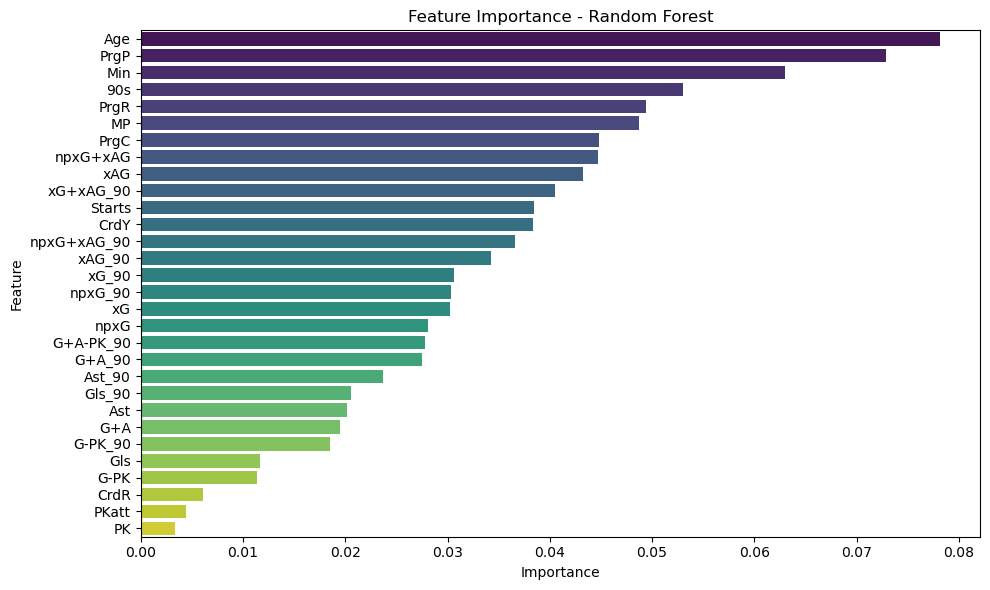

In [30]:

# Get importances and feature names
importances = rf.feature_importances_
features = X.columns

# Sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


     

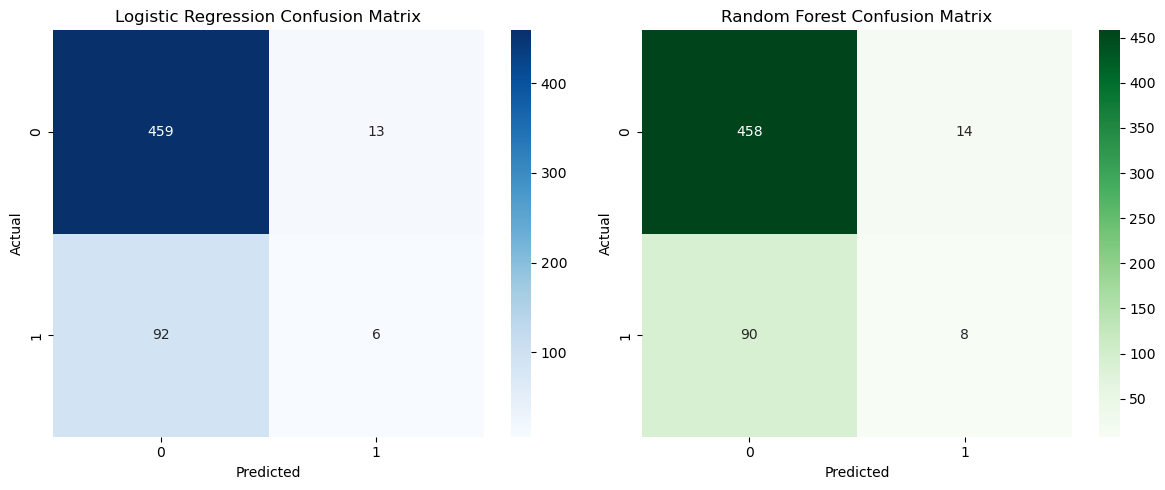

In [31]:

# Confusion Matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [32]:


# Check class distribution
print(y.value_counts(normalize=True))


Selected
0    0.828943
1    0.171057
Name: proportion, dtype: float64


In [33]:

# Logistic Regression Report
print("📌 Logistic Regression")
print(classification_report(y_test, y_pred_logreg, target_names=["Not Selected", "Selected"]))

# Random Forest Report
print("\n📌 Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=["Not Selected", "Selected"]))



📌 Logistic Regression
              precision    recall  f1-score   support

Not Selected       0.83      0.97      0.90       472
    Selected       0.32      0.06      0.10        98

    accuracy                           0.82       570
   macro avg       0.57      0.52      0.50       570
weighted avg       0.74      0.82      0.76       570


📌 Random Forest
              precision    recall  f1-score   support

Not Selected       0.84      0.97      0.90       472
    Selected       0.36      0.08      0.13        98

    accuracy                           0.82       570
   macro avg       0.60      0.53      0.52       570
weighted avg       0.75      0.82      0.77       570

